In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("Packages Imported")

Packages Imported


In [2]:
def plot_func(f, window, res=10000, title=None):
    t = np.linspace(window[0], window[1], res)
    y = f(t)
    plt.plot(t, y, color="purple")
    plt.grid(True)
    
    if title is not None:
        plt.title(title)

In [3]:
def cos_transform(c):
    return lambda x: np.cos(c*2*np.pi*x)

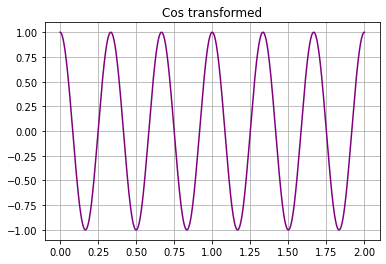

In [4]:
plot_func(cos_transform(3), (0, 2), title="Cos transformed")

In [5]:
def riemann_sum(f, bounds, N=100000):
    t_values = np.linspace(bounds[0], bounds[1], N)
    integral_approx = np.sum(f(t_values))*(bounds[1]-bounds[0])/N
    return integral_approx

In [6]:
def tan_inv(a, b):
    if a < 0:
        return np.pi + np.arctan(b/a)
    else:
        return np.arctan(b/a)

In [7]:
def plot_euler(imag_f, limits, res=10000):

    t = np.linspace(limits[0], limits[1], res)
    vec = imag_f(t)

    a = np.real(vec)
    b = np.imag(vec)

    theta = [tan_inv(a[i], b[i]) for i in range(len(a))]
    r = np.sqrt(a**2 + b**2)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, r, color="magenta")
    # ax.set_rticks([0.25, 0.5, 1])  # Less radial ticks
    ax.grid(True)

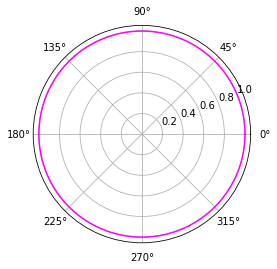

In [8]:
# a look into euler's formula
f = lambda t: np.e**(t*1j)

plot_euler(f, (0, 2*np.pi))

In [9]:
# fourier transform formula
def fourier_func(sig_f, freq):
    return lambda t: sig_f(t)*np.e**-(1j*2*np.pi*freq*t)

C:\Users\User\AppData\Local\Temp/ipykernel_3120/2502669979.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.arctan(b/a)


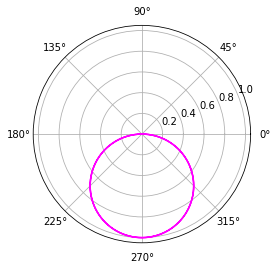

In [10]:
f = fourier_func(np.sin, 1/(2*np.pi))

plot_euler(f, (0, 2*np.pi))

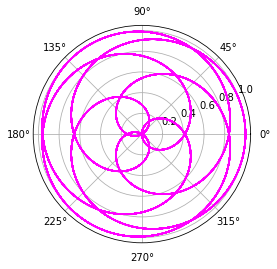

In [50]:
f = fourier_func(cos_transform(3), 11)

plot_euler(f, (0, 6), res = 100000)

In [51]:
# finding center of mass 

In [97]:
def plot_transform(sig_f, bounds, limits=(0,5), N=100000, res=500, peaks=True):
    freqs = np.linspace(limits[0], limits[1], res)
    power = [np.real(riemann_sum(fourier_func(sig_f, freq), bounds, N=N)) for freq in freqs]
    
    plt.plot(freqs, np.abs(power), color="lime")
    plt.grid(True)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    
    if peaks:
        return find_peaks(freqs, np.array(power))

In [55]:
# identifying peaks
def find_peaks(freqs, power):
    threshold = max(power)/2
    peak_mask = np.append(np.diff(power>threshold), False)
    peak_indices = np.arange(0, len(power))[peak_mask]
    i = 0
    peak_vals = []
    while i < len(peak_indices):
        peak_vals.append(np.round(max(freqs[peak_indices[i]:peak_indices[i+1]]), 3))
        i += 2
    return peak_vals

In [ ]:
# parameters:

# riemann sum box count (N) and range to perform it over (bounds)
# plot resolution (res) and plotting limits (limits)

([4.058],)

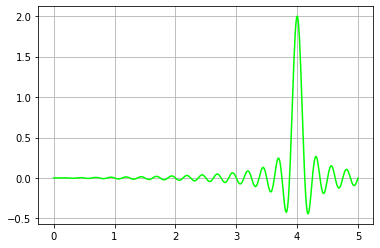

In [57]:
plot_transform(cos_transform(4), bounds = (0, 4)), # integral from 0 to 4, plot limits 0 to 5, graph res = 500, 
                                                    # integral N=100000

In [58]:
def create_multi_freq_func(freqs):
    return lambda t: sum([cos_transform(freq)(t) for freq in freqs])

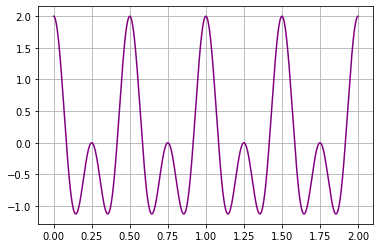

In [60]:
sig_f = create_multi_freq_func([2, 4])

plot_func(sig_f, (0, 2))

[2.044, 4.048]

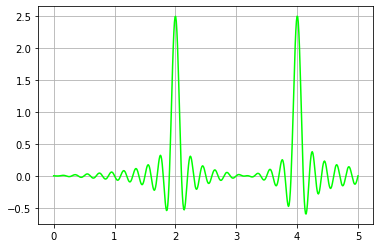

In [61]:
plot_transform(sig_f, bounds = (0, 5))

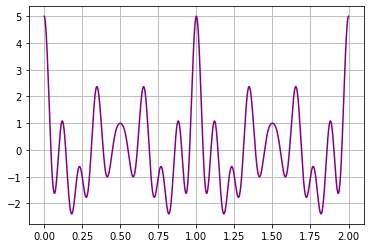

In [63]:
sig_f = create_multi_freq_func([2,3,6,8,9])

plot_func(sig_f, (0, 2))

[2.024, 3.026, 6.032, 8.036, 9.038]

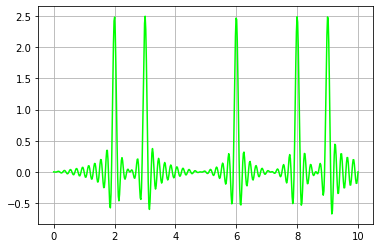

In [64]:
plot_transform(sig_f, limits=(0, 10), bounds=(0,5))

[2.184, 3.287, 6.253, 8.236, 9.319]

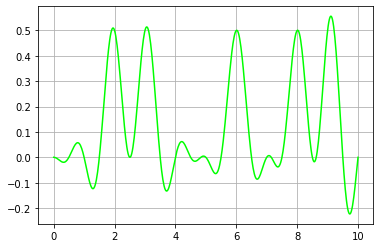

In [65]:
# take a look at different parameters

plot_transform(sig_f, limits=(0, 10), bounds=(0,1)) # narrow integral bounds

[2.024, 3.026, 6.032, 8.036, 9.038]

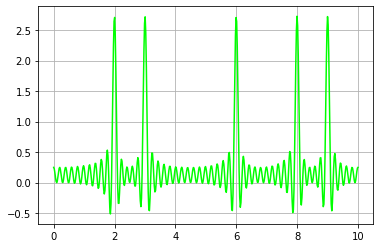

In [70]:
plot_transform(sig_f, limits=(0, 10), bounds=(0,5), N=100) # low riemann sum rectangle count N

[1.984, 2.986, 7.976, 8.978]

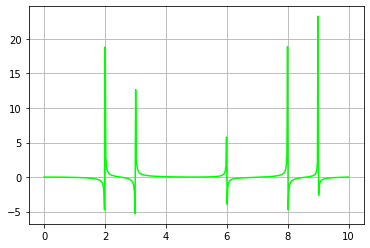

In [71]:
plot_transform(sig_f, limits=(0, 10), bounds=(0,50), N=1000000) # high N and broad range

[2.004, 3.006, 5.992, 7.996, 8.998]

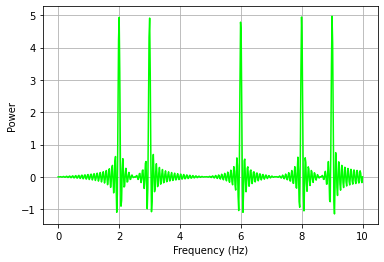

In [74]:
plot_transform(sig_f, limits=(0, 10), bounds=(0,10))

In [ ]:
# higher integral range leads to higher overall power, less noise, greater discrepancy between frequencies

# Look at real data

In [2]:
from pydub import AudioSegment
from time import time as timer

sound = AudioSegment.from_mp3("sound_files/Cmaj7.mp3")

# get the frame rate
sample_rate = sound.frame_rate
# get amount of bytes contained in one sample
sample_size = sound.sample_width
# get channels
channels = sound.channels

print(f"Sample rate: {sample_rate}\nSample size: {sample_size}\nChannels: {channels}")

Sample rate: 44100
Sample size: 2
Channels: 1


In [3]:
amplitudes = sound.get_array_of_samples()
times = np.arange(len(amplitudes))/sample_rate

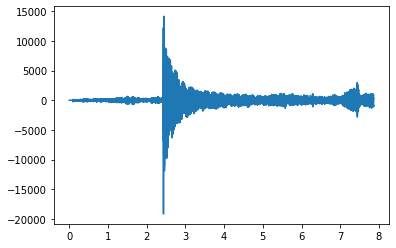

In [77]:
plt.plot(times, amplitudes);

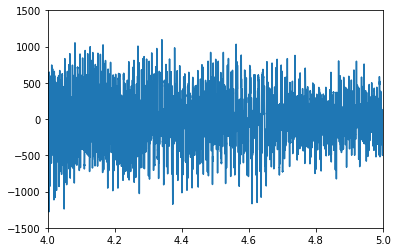

In [78]:
plt.plot(times, amplitudes)
plt.xlim([4,5])
plt.ylim([-1500,1500]);

In [79]:
def create_sig_f(times, amplitudes):
    def raw_sig_f(t):
        if hasattr(t, '__iter__'):
            return np.array([raw_sig_f(x) for x in t])
        else:
            idx = (np.abs(times - t)).argmin()
            return amplitudes[idx]
    return raw_sig_f

In [84]:
amp_range = np.array(amplitudes)[(times > 4) & (times < 5)]
times_range =  times[(times > 4) & (times < 5)]

In [88]:
norm_amps = (amp_range/(max(amp_range)))*32767

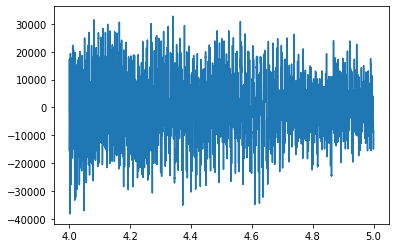

In [89]:
plt.plot(times_range, norm_amps)

Finished in 9.250908374786377 s


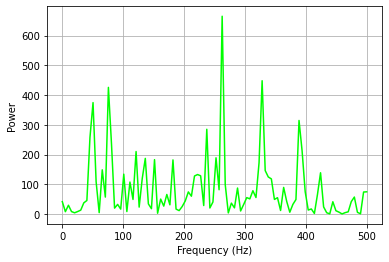

In [100]:
t_start = timer()

plot_transform(create_sig_f(times_range, norm_amps), limits=(0, 500), bounds=(4,5), peaks=True, res=100, N=1000)

print(f"Finished in {timer()-t_start} s")

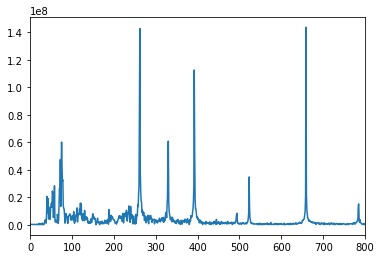

In [74]:
# look at scipy example

from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(norm_amps)
xf = rfftfreq(len(norm_amps), 1 / sample_rate)

plt.plot(xf, abs(yf))
plt.xlim([0,800])
plt.show()

In [ ]:
yf = rfft(norm_amps)
xf = rfftfreq(len(norm_amps), 1 / sample_rate)

plt.plot(xf, abs(yf))
plt.xlim([0,500])
plt.show()

In [ ]:
# the integration process is taking forever

In [ ]:
# change integration process so that N = duration/sample_rate

In [147]:
def discrete_fourier_integral(amplitudes, freq):
    time_indices = np.arange(0, len(amplitudes))
    return  np.sum([amplitudes[i]*np.e**-(1j*2*np.pi*freq*(i/len(amplitudes))) for i in time_indices])#/(len(amplitudes)/sample_rate)

In [148]:
def fast_fourier_plot(amplitudes, limits=(0,5), res=500, peaks=True):
    freqs = np.linspace(limits[0], limits[1], res)
    power = [np.real(discrete_fourier_integral(amplitudes, freq)) for freq in freqs]
    
    plt.plot(freqs, np.abs(power), color="lime")
    plt.grid(True)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    
    if peaks:
        return find_peaks(freqs, np.array(power))

Finished in 99.5903947353363 s


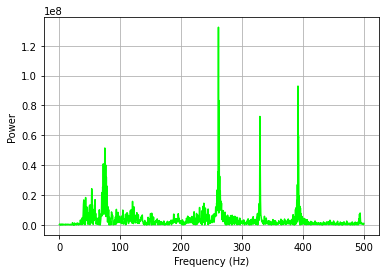

In [149]:
t_start = timer()

fast_fourier_plot(norm_amps, sample_rate, limits=(0, 500), peaks=True, res=1000)

print(f"Finished in {timer()-t_start} s")

Cooley-Tukey Algorithm

In [12]:
def make_power_two(X):
    
    return X[:2**int(np.log2(len(X)))]

In [58]:
def cooley_tukey_fft(amplitudes):
    
    X = np.asarray(amplitudes, dtype=float)
    N = len(amplitudes)
    
    if len(amplitudes) == 1:
        return amplitudes
    if N % 2 > 0:
        raise ValueError("Must be power of 2")
    
    
    even = cooley_tukey_fft(X[::2])
    odd = cooley_tukey_fft(X[1::2])
    
    constants = np.exp(-1j*2*np.pi*np.arange(N)/N)
    
    return np.concatenate([even + constants[:N // 2] * odd, even + constants[N // 2:] * odd])
    

In [66]:
amp_range = np.array(amplitudes)[(times > 4) & (times < 5)]
times_range =  times[(times > 4) & (times < 5)]

In [67]:
norm_amps = (amp_range/(max(amp_range)))*32767

In [68]:
X = make_power_two(norm_amps)

In [69]:
Y = cooley_tukey_fft(X)

In [70]:
np.real(Y)

array([613416.19452055, 566710.28554128, 578841.3775671 , ...,
       564305.18438602, 578841.3775671 , 566710.28554128])

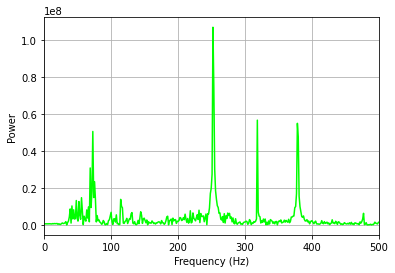

In [81]:
import matplotlib.pyplot as plt

scale_factor = 1.3

plt.plot(np.arange(len(Y))*scale_factor, np.abs(np.real(Y)), color="lime")
plt.grid(True)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim([0,500]);

In [ ]:
# Scale is off and idk why!!1

In [153]:
# the above method is an O(N^2) process, must do better

In [ ]:
# https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm
# implement cooley-tukey algorithm

In [48]:
# expected peaks: 261.63, 329.63, 392.00, 493.88

# probably want to vertically center the signal to get rid of jump at beginnning 
# use more efficient integration

# peak finding needs work too